In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 5.1 a

In [33]:

def average_matrices(file_list):
    """
    Load each CSV in file_list as a 2D array and return their element‐wise mean.
    """
    # read all files into a list of 2D arrays
    mats = [np.loadtxt(fname, delimiter=',') for fname in file_list]
    # stack into shape (n_files, rows, cols) and average over axis 0
    return np.stack(mats, axis=0).mean(axis=0) * (25/0.9)

# ── example usage ──
u_files = [f'/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset5/OceanFlow/{i}u.csv' for i in range(1, 101)]
v_files = [f'/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset5/OceanFlow/{i}v.csv' for i in range(1, 101)]

avg_u = average_matrices(u_files)
avg_v = average_matrices(v_files)


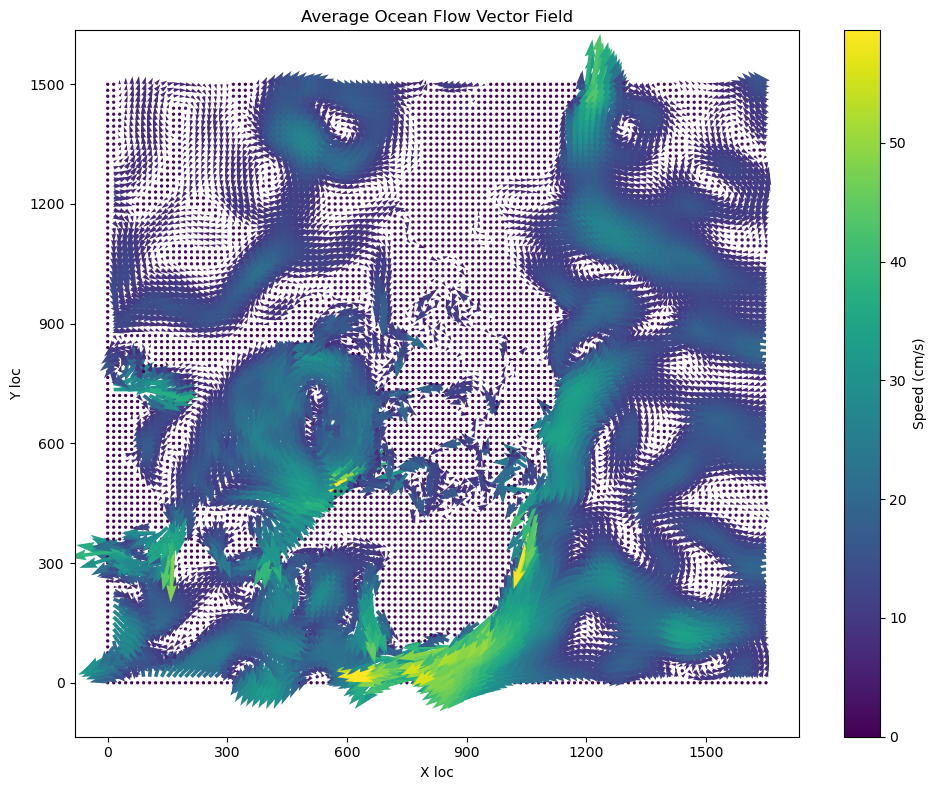

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# avg_u, avg_v = your 2D numpy arrays from before
n_rows, n_cols = avg_u.shape

# full-coordinate grid
x = np.arange(n_cols)
y = np.arange(n_rows)
X, Y = np.meshgrid(x, y)

# choose a stride (e.g. every 5th arrow)
stride = 5

# subsample everything
Xs = X[::stride, ::stride]
Ys = Y[::stride, ::stride]
Us = avg_u[::stride, ::stride]
Vs = avg_v[::stride, ::stride]
Speeds = np.sqrt(Us**2 + Vs**2)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# plot the quiver
q = ax.quiver(
    Xs, Ys,
    Us, Vs,
    Speeds,
    angles='xy',
    scale_units='xy',
    scale=1,
    cmap='viridis',
    width=0.005
)

# add colorbar
cbar = fig.colorbar(q, ax=ax, label='Speed (cm/s)')

# formatter to multiply tick labels by 3
three_times = FuncFormatter(lambda val, pos: f"{val*3:.0f}")

# apply to both axes
ax.xaxis.set_major_formatter(three_times)
ax.yaxis.set_major_formatter(three_times)

# labels and title
ax.set_xlabel('X loc')
ax.set_ylabel('Y loc')
ax.set_title('Average Ocean Flow Vector Field')

ax.axis('equal')
plt.tight_layout()

# save and show
fig.savefig("flow_vec_field.png")
plt.show()

In [35]:
import numpy as np

# avg_u, avg_v are your 2D numpy arrays from before

# Step 1: compute the flow magnitude at each point
flow = np.sqrt(avg_u**2 + avg_v**2)

# Step 2: flatten and get the indices of the top 10 flow values
flat_flow   = flow.flatten()
top10_idx   = np.argsort(flat_flow)[::-1][:10]  # descending order

# Step 3: convert flat indices back to 2D grid coordinates
rows, cols = np.unravel_index(top10_idx, flow.shape)

# Step 4: collect the results
top10_flows = []
for r, c in zip(rows, cols):
    top10_flows.append({
        'row':  r,
        'col':  c,
        'u':    avg_u[r, c],
        'v':    avg_v[r, c],
        'flow': flow[r, c]
    })

# Step 5: print them out
print("Top 10 highest‐flow locations:")
for i, loc in enumerate(top10_flows, 1):
    print(f"{i:2d}. ({3*loc['row']}km, {3*loc['col']}km): "
          f"u={loc['u']:.4f}, v={loc['v']:.4f}, flow={loc['flow']:.4f} cm/s")


Top 10 highest‐flow locations:
 1. (54km, 762km): u=-61.1255, v=-15.1715, flow=62.9802 cm/s
 2. (51km, 762km): u=-61.1339, v=-14.8087, flow=62.9020 cm/s
 3. (54km, 765km): u=-60.5207, v=-16.1124, flow=62.6288 cm/s
 4. (51km, 759km): u=-61.0141, v=-13.5549, flow=62.5016 cm/s
 5. (51km, 765km): u=-60.4871, v=-15.5990, flow=62.4661 cm/s
 6. (54km, 759km): u=-60.9294, v=-13.7327, flow=62.4578 cm/s
 7. (405km, 1068km): u=-16.6628, v=-60.1305, flow=62.3965 cm/s
 8. (51km, 756km): u=-60.8942, v=-12.3010, flow=62.1242 cm/s
 9. (54km, 756km): u=-60.7332, v=-12.2938, flow=61.9649 cm/s
10. (402km, 1068km): u=-17.0937, v=-59.4559, flow=61.8644 cm/s


### part 5.1 b

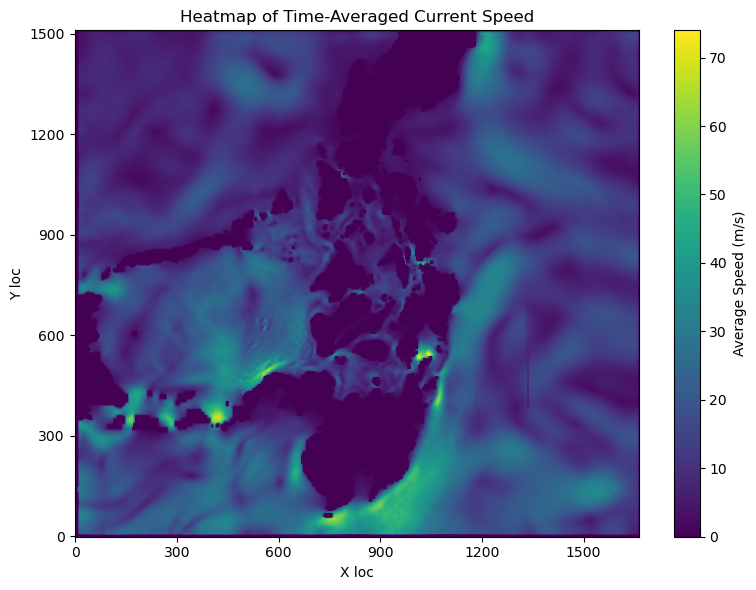

In [36]:
# 1) compute per‐timestep speed and collect
speed_stack = []
for uf, vf in zip(u_files, v_files):
    u = np.loadtxt(uf, delimiter=',') * (25/0.9)
    v = np.loadtxt(vf, delimiter=',') * (25/0.9)
    speed_stack.append(np.sqrt(u**2 + v**2))

# 2) stack and average over time
speed_stack = np.stack(speed_stack, axis=0)   # (timesteps, rows, cols)
avg_speed   = speed_stack.mean(axis=0)        # (rows, cols)

# 3) plot the heatmap with axes tick labels ×3
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(
    avg_speed,
    origin='lower',
    cmap='viridis',
    aspect='auto'
)
cbar = fig.colorbar(im, ax=ax, label='Average Speed (m/s)')

# create formatter to multiply tick labels by 3
three_times = FuncFormatter(lambda val, pos: f"{val*3:.0f}")

# apply to x and y axes
ax.xaxis.set_major_formatter(three_times)
ax.yaxis.set_major_formatter(three_times)

ax.set_xlabel('X loc')
ax.set_ylabel('Y loc')
ax.set_title('Heatmap of Time‐Averaged Current Speed')
plt.tight_layout()
plt.savefig("avg_speed.png")
plt.show()

In [41]:
# avg_u, avg_v: your 2D arrays of the averaged vector components
# avg_speed: your 2D array of time-averaged speeds (computed per-timestep then averaged)
# Compute avg_flow = magnitude of the averaged vector
avg_flow = np.sqrt(avg_u**2 + avg_v**2)

# Compute thresholds
flow_high_thr  = np.percentile(avg_flow, 50)  # top 10% flow
flow_low_thr   = np.percentile(avg_flow, 50)  # bottom 10% flow
speed_high_thr = np.percentile(avg_speed, 50) # top 10% speed
speed_low_thr  = np.percentile(avg_speed, 50) # bottom 10% speed

# Masks
highFlow_slowSpeed = (avg_flow  > flow_high_thr) & (avg_speed < speed_low_thr)
lowFlow_fastSpeed  = (avg_flow  < flow_low_thr)  & (avg_speed > speed_high_thr)

# Get grid coordinates
hf_ss_idx = np.argwhere(highFlow_slowSpeed)
lf_fs_idx = np.argwhere(lowFlow_fastSpeed)

# Report
print("High-flow but slow-speed locations:")
for (r, c) in hf_ss_idx:
    print(f"  ({3*r}km, {3*c}km)  flow={avg_flow[r,c]:.3f}, speed={avg_speed[r,c]:.3f}")

print("\nLow-flow but fast-speed locations:")
for (r, c) in lf_fs_idx:
    print(f"  (row={r}, col={c})  flow={avg_flow[r,c]:.3f}, speed={avg_speed[r,c]:.3f}")


High-flow but slow-speed locations:
  (6km, 87km)  flow=9.800, speed=9.800
  (6km, 90km)  flow=10.646, speed=10.646
  (6km, 108km)  flow=11.014, speed=11.014
  (6km, 111km)  flow=10.963, speed=10.963
  (6km, 114km)  flow=10.912, speed=10.912
  (6km, 141km)  flow=10.858, speed=10.858
  (6km, 144km)  flow=10.446, speed=10.446
  (6km, 147km)  flow=10.228, speed=10.228
  (6km, 150km)  flow=10.011, speed=10.011
  (6km, 153km)  flow=9.880, speed=9.880
  (6km, 156km)  flow=9.836, speed=9.836
  (6km, 159km)  flow=9.792, speed=9.792
  (6km, 162km)  flow=9.727, speed=9.727
  (6km, 165km)  flow=9.640, speed=9.640
  (6km, 168km)  flow=9.553, speed=9.553
  (6km, 171km)  flow=9.421, speed=9.421
  (6km, 321km)  flow=9.911, speed=9.911
  (6km, 324km)  flow=10.819, speed=10.819
  (6km, 327km)  flow=10.534, speed=10.534
  (6km, 330km)  flow=10.250, speed=10.250
  (6km, 333km)  flow=9.748, speed=9.748
  (6km, 354km)  flow=9.688, speed=9.688
  (6km, 357km)  flow=10.331, speed=10.331
  (6km, 360km)  flow=1